In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

import numpy as np
from keras.preprocessing import image
from keras import models
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [3]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('D:/Online_Courses/iNeuron/DeepLearning/Deep_Learning_2/Practise/family_binary',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('D:/Online_Courses/iNeuron/DeepLearning/Deep_Learning_2/Practise/family_binary',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

model = classifier.fit_generator(training_set,
                         steps_per_epoch = 1000,
                         epochs = 1,
                         validation_data = test_set,    
                         validation_steps = 2000)

classifier.save("binary_model_2.h5")
print("Saved model to disk")

Found 58 images belonging to 2 classes.
Found 58 images belonging to 2 classes.
Epoch 1/1
1000/1000 [==============================] - 13412s 13s/step - loss: 0.0203 - accuracy: 0.9911 - val_loss: 1.8528e-05 - val_accuracy: 1.0000
Saved model to disk


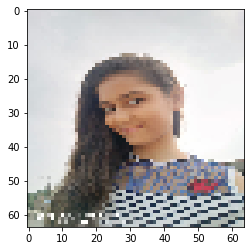

parul


In [20]:
# Part 3 - Making new predictions

model = models.load_model('binary_model.h5')
pic = 'D:/Online_Courses/iNeuron/DeepLearning/Deep_Learning_2/Practise/test_image/p6.jpeg'

test_image = image.load_img(pic, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
training_set.class_indices

test_image /= 255.
plt.imshow(test_image[0])
plt.show()


if result[0][0] == 1:
    prediction = 'parul'
    print(prediction)
else:
    prediction = 'mom'
    print(prediction)

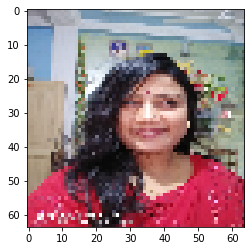

mom


In [22]:
# Part 3 - Making new predictions

model = models.load_model('binary_model.h5')
pic = 'D:/Online_Courses/iNeuron/DeepLearning/Deep_Learning_2/Practise/test_image/m68.jpeg'

test_image = image.load_img(pic, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
training_set.class_indices

test_image /= 255.
plt.imshow(test_image[0])
plt.show()


if result[0][0] == 1:
    prediction = 'parul'
    print(prediction)
else:
    prediction = 'mom'
    print(prediction)